In [ ]:
# TODO
# * manually add HTT/C9orf72 Asuragen calls
# * remove SCA2 - capillary suspicious
# * list in supp methods all the other loci we tested but which were unreliable

In [79]:
%pylab inline
import pandas as pd

merged = pd.read_csv("TableS3-WGSvsCapillary.csv")

# Remove FXN, since no WGS calls
merged = merged[merged["PrimerID"]!="FXN"]

# Get dosages and check matches
def GetDosage(x):
    if x == "." or x == "./.": return np.nan
    else: return sum([int(float(item)) for item in x.split(",")])
    
merged["dosage.ensemble"] = merged["Ensemble"].apply(GetDosage)
merged["dosage.cap"] = merged["Cap.Binned"].apply(GetDosage)

Populating the interactive namespace from numpy and matplotlib


In [100]:
######## Output summary info ########
print("Number of loci: %s"%(len(set(merged["PrimerID"]))))
print("Number of samples: %s"%(len(set(merged["SampleID"]))))
print("Number of calls: %s"%(merged.shape[0]))

num_nonmissing = (merged[merged["Ensemble"]!="./."].shape[0])
num_correct = (np.sum(merged[merged["Ensemble"]!="./."]["match.ensemble"]))
print("Number of calls (not missing): %s"%num_nonmissing)
print("Number of correct: %s"%num_correct)
print("Concordance: %s"%(num_correct/num_nonmissing))

Number of loci: 49
Number of samples: 31
Number of calls: 1519
Number of calls (not missing): 1515
Number of correct: 1431
Concordance: 0.9445544554455445


In [107]:
######## Inspect discordant calls ########
merged[(merged["Ensemble"]!="./.") & (merged["match.ensemble"]==False)].sort_values("PrimerID")

,PrimerID,SampleID,RefProductSize,period,Prd,Cap.Binned,HipSTR,GangSTR,Ensemble,match.hipstr,match.gangstr,match.ensemble,dosage.ensemble,dosage.cap
0,ATN1,NA12892,158,3,151.47/157.35,"0,2","0,0","0,1","0,0",False,False,False,0.0,2.0
317,ATN1,HG00268,158,3,154.29/157.22,"1,2","0,2","1,2","0,2",False,True,False,2.0,3.0
316,ATN1,NA19434,158,3,142.71/154.43,"-3,1","-3,0","-3,1","-3,0",False,True,False,-3.0,-2.0
309,ATN1,HG01113,158,3,145.88/154.45,"-2,1","-2,0","-2,1","-2,0",False,True,False,-2.0,-1.0
306,ATN1,NA20506,158,3,151.45/183.44,"0,11","0,8","0,6","0,8",False,False,False,8.0,11.0
3,ATN1,NA12890,158,3,136.88/154.33,"-5,1","-5,0","-5,1","-5,0",False,True,False,-5.0,-4.0
2,ATN1,NA12889,158,3,154.38/160.28,"1,3","0,3","1,3","0,3",False,True,False,3.0,4.0
424,DMPK,HG00732,909,3,858.75/862.0,"-16,-15","-15,-15","-15,-15","-15,-15",False,False,False,-30.0,-31.0
461,HTT,NA19238,122,3,108.28/108.28,"-3,-3","-4,-3","-4,-1","-4,-3",False,False,False,-7.0,-6.0
464,HTT,NA18940,122,3,111.14/111.14,"-2,-2",./.,"-2,-2","-5,-5",NaN,True,False,-10.0,-4.0


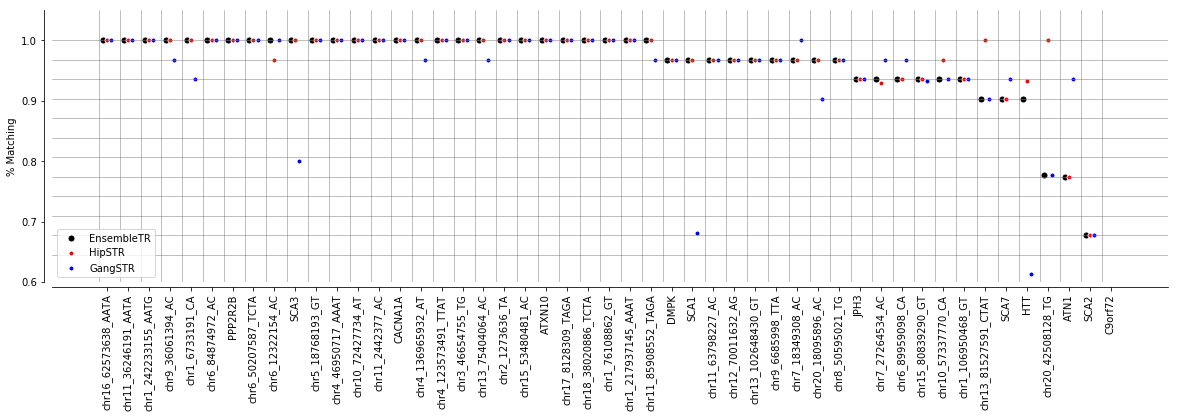

In [138]:
######## Per-locus accuracy ########
locdata = merged[merged["Ensemble"]!="./."].groupby(["PrimerID"], as_index=False).agg({"match.ensemble": np.sum, "SampleID": len})
locdata["ens.acc"] = locdata.apply(lambda x: x["match.ensemble"]/x["SampleID"], 1)
locdata = locdata.sort_values("ens.acc", ascending=False)

locdata_g = merged[merged["GangSTR"]!="./."].groupby(["PrimerID"], as_index=False).agg({"match.gangstr": np.sum, "SampleID": len})
locdata_g["gangstr.acc"] = locdata_g.apply(lambda x: x["match.gangstr"]/x["SampleID"], 1)
locdata_h = merged[merged["HipSTR"]!="./."].groupby(["PrimerID"], as_index=False).agg({"match.hipstr": np.sum, "SampleID": len})
locdata_h["hipstr.acc"] = locdata_h.apply(lambda x: x["match.hipstr"]/x["SampleID"], 1)

locdata = pd.merge(locdata, locdata_g[["PrimerID","gangstr.acc"]], how="left", on=["PrimerID"])
locdata = pd.merge(locdata, locdata_h[["PrimerID","hipstr.acc"]], how="left", on=["PrimerID"])
locdata = locdata.sort_values("ens.acc", ascending=False)

w = 0.2
fig = plt.figure()
fig.set_size_inches((20, 5))
ax = fig.add_subplot(111)
ax.scatter(range(locdata.shape[0]), locdata["ens.acc"], edgecolor="white", color='black', 
       label="EnsembleTR", s=50)
ax.scatter([item+w for item in range(locdata.shape[0])], locdata["hipstr.acc"], edgecolor="white", 
       color='red',label="HipSTR", s=25)
ax.scatter([item+2*w for item in range(locdata.shape[0])], locdata["gangstr.acc"], edgecolor="white", 
       color='blue', label="GangSTR", s=25)

for i in range((locdata.shape[0])):
    ax.axvline(x=i-w, linestyle="solid", color="gray", linewidth=0.5)

ax.set_ylim(bottom=0.6, top=1.05)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 5))
plt.rcParams['axes.linewidth']=0.8

ax.set_xticks([item+w for item in range(locdata.shape[0])])
ax.set_xticklabels(locdata["PrimerID"], rotation=90);
ax.set_ylabel("% Matching");
ax.legend(loc="lower left");

for num_corr in range(20, 32):
    ax.axhline(y=num_corr/31, linestyle="solid", color="gray", linewidth=0.5)

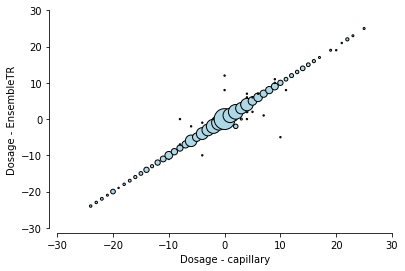

In [103]:
######## Bubbles ########

bubbles = merged[merged["Ensemble"]!="./."].groupby(["dosage.ensemble","dosage.cap"], as_index=False).agg({"SampleID": len})

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(bubbles["dosage.cap"], bubbles["dosage.ensemble"], 
           s=bubbles["SampleID"]*2, edgecolor="black", color="lightblue")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 5))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(left=-30, right=30)
ax.set_ylim(bottom=-30, top=30);
ax.set_xlabel("Dosage - capillary")
ax.set_ylabel("Dosage - EnsembleTR");